# Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard

Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [3]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [24]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

# Replace with the URL of the page you're scraping from
url = "https://finance.yahoo.com/quote/TSLA/financials/"

# Set headers to simulate a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Send the request with headers
html_content = requests.get(url, headers=headers).text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

financial_data = []

# Find all divs that seem to represent financial rows (e.g., "rowTitle" may represent row labels)
rows = soup.find_all('div', class_=re.compile(r'.*row.*'))

for row in rows:
    # Extract financial data
    columns = row.find_all('div', class_=re.compile(r'.*column.*'))
    if not columns:
        continue 

    row_values = [col.get_text(strip=True) for col in columns]
    
    # Add the title and values to the financial data list
    financial_data.append(row_values)

#headers list
financial_headers =[]
for i in financial_data[1:]:
    financial_headers.append(i[0])

#values list
financial_values = []
for a in financial_data[1:]:
    financial_values.append(a[1:])

#transpose values
financial_values = list(zip(*financial_values))

#financial_data.tail()
df = pd.DataFrame(financial_values,columns=financial_headers)
cut_data = df.tail(5)
print(cut_data)



   Total Revenue Cost of Revenue   Gross Profit Operating Expense  \
0  97,150,000.00   79,441,000.00  17,709,000.00      9,475,000.00   
1  96,773,000.00   79,113,000.00  17,660,000.00      8,769,000.00   
2  81,462,000.00   60,609,000.00  20,853,000.00      7,021,000.00   
3  53,823,000.00   40,217,000.00  13,606,000.00      7,110,000.00   
4  31,536,000.00   24,906,000.00   6,630,000.00      4,636,000.00   

  Operating Income Net Non Operating Interest Income Expense  \
0     8,234,000.00                              1,145,000.00   
1     8,891,000.00                                910,000.00   
2    13,832,000.00                                106,000.00   
3     6,496,000.00                               -315,000.00   
4     1,994,000.00                               -718,000.00   

  Other Income Expense  Pretax Income  Tax Provision  \
0          -964,000.00   8,415,000.00  -4,349,000.00   
1           172,000.00   9,973,000.00  -5,001,000.00   
2          -219,000.00  13,719,0

Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

In [25]:
import yfinance as yf

games = yf.Ticker("GME")
gme_data = games.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [26]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

# Replace with the URL of the page you're scraping from
url = "https://finance.yahoo.com/quote/GME/financials/"

# Set headers to simulate a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Send the request with headers
html_content = requests.get(url, headers=headers).text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

financial_data = []

# Find all divs that seem to represent financial rows (e.g., "rowTitle" may represent row labels)
rows = soup.find_all('div', class_=re.compile(r'.*row.*'))

for row in rows:
    # Extract financial data
    columns = row.find_all('div', class_=re.compile(r'.*column.*'))
    if not columns:
        continue 

    row_values = [col.get_text(strip=True) for col in columns]
    
    # Add the title and values to the financial data list
    financial_data.append(row_values)

#headers list
financial_headers =[]
for i in financial_data[1:]:
    financial_headers.append(i[0])

#values list
financial_values = []
for a in financial_data[1:]:
    financial_values.append(a[1:])

#transpose values
financial_values = list(zip(*financial_values))

#financial_data.tail()
df = pd.DataFrame(financial_values,columns=financial_headers)
cut_data = df.tail(5)
print(cut_data)

  Total Revenue Cost of Revenue  Gross Profit Operating Expense  \
0  4,334,000.00    3,164,300.00  1,169,700.00      1,207,100.00   
1  5,272,800.00    3,978,600.00  1,294,200.00      1,323,900.00   
2  5,927,200.00    4,555,100.00  1,372,100.00      1,681,000.00   
3  6,010,700.00    4,662,900.00  1,347,800.00      1,709,600.00   
4  5,089,800.00    3,830,300.00  1,259,500.00      1,514,200.00   

  Operating Income Net Non Operating Interest Income Expense  \
0       -37,400.00                                123,900.00   
1       -29,700.00                                 49,500.00   
2      -308,900.00                                  9,500.00   
3      -361,800.00                                -26,900.00   
4      -254,700.00                                -32,100.00   

  Other Income Expense Pretax Income Tax Provision  \
0           -12,900.00     73,600.00     10,500.00   
1            -6,700.00     13,100.00      6,400.00   
2            -2,700.00   -302,100.00     11,000.00

Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

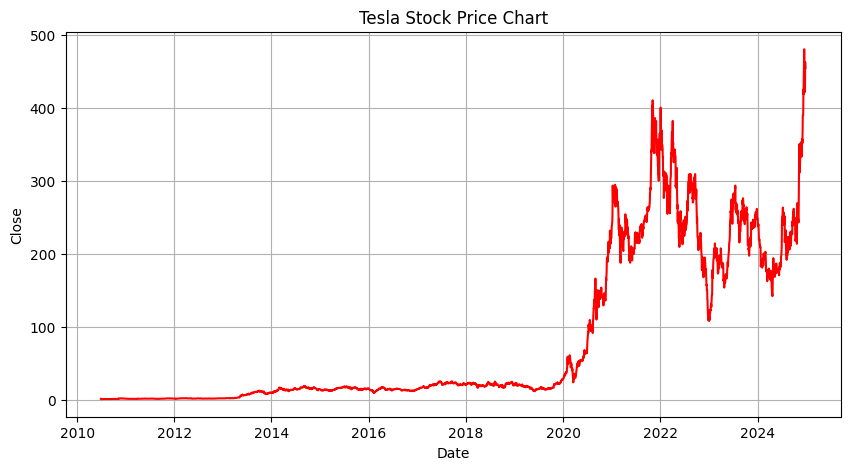

In [44]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Define the graphing function
def make_graph(data, x_col, y_col, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data[x_col], data[y_col], label=y_col, color='red')
    plt.title(title, fontsize=12)
    plt.ylabel(y_col)
    plt.xlabel(x_col)
    plt.grid(True)
    plt.show()

make_graph(tesla_data, x_col="Date", y_col="Close", title="Tesla Stock Price Chart")


Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

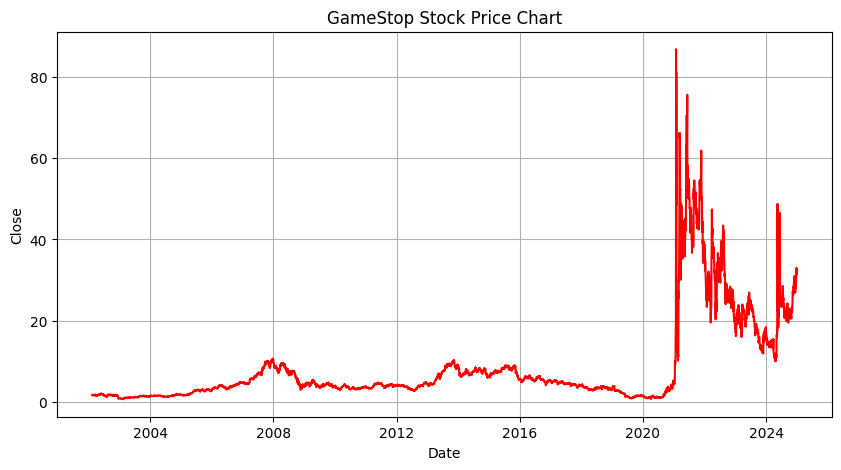

In [47]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data
game = yf.Ticker("GME")
gme_data = game.history(period="max")
gme_data.reset_index(inplace=True)

# Define the graphing function
def make_graph(data, x_col, y_col, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data[x_col], data[y_col], label=y_col, color='red')
    plt.title(title, fontsize=12)
    plt.ylabel(y_col)
    plt.xlabel(x_col)
    plt.grid(True)
    plt.show()

make_graph(gme_data, x_col="Date", y_col="Close", title="GameStop Stock Price Chart")
